In [1]:
import pandas as pd
k_df=pd.read_json("cleaned_data.json")

In [2]:
k_df.head()

,reportingGroup,locationName,value,unit
2020-01-01 00:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2020-01-01 01:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2020-01-01 02:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh
2020-01-01 03:00:00,Electricity,1000 Hakaniemen kauppahalli,0.07,kWh
2020-01-01 04:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh


In [3]:
k_df['unique_id']=1

In [4]:
k_df.head()

,reportingGroup,locationName,value,unit,unique_id
2020-01-01 00:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
2020-01-01 01:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
2020-01-01 02:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
2020-01-01 03:00:00,Electricity,1000 Hakaniemen kauppahalli,0.07,kWh,1
2020-01-01 04:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1


In [5]:
new_df=k_df.loc["2020-01-01 00:00:00":"2020-11-30 23:00:00"]
new_df.shape

(8040, 5)

In [6]:
uids = new_df['unique_id'].unique()[:10] # Select 10 ids to make the example faster
new_df = new_df.query('unique_id in @uids')

In [7]:
new_df

,reportingGroup,locationName,value,unit,unique_id
2020-01-01 00:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
2020-01-01 01:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
2020-01-01 02:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
2020-01-01 03:00:00,Electricity,1000 Hakaniemen kauppahalli,0.07,kWh,1
2020-01-01 04:00:00,Electricity,1000 Hakaniemen kauppahalli,0.06,kWh,1
...,...,...,...,...,...
2020-11-30 19:00:00,Electricity,1000 Hakaniemen kauppahalli,0.05,kWh,1
2020-11-30 20:00:00,Electricity,1000 Hakaniemen kauppahalli,0.07,kWh,1
2020-11-30 21:00:00,Electricity,1000 Hakaniemen kauppahalli,0.05,kWh,1
2020-11-30 22:00:00,Electricity,1000 Hakaniemen kauppahalli,0.05,kWh,1


In [8]:
new_df = new_df.groupby('unique_id').tail(7 * 24) #Select last 7 days of data to make example faster

In [9]:
from statsforecast import StatsForecast


C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
Y_df = pd.DataFrame({
    'ds': new_df.index,  # Timestamps as 'ds'
    'y': new_df['value'],  # The actual data as 'y'
    'unique_id':new_df['unique_id']  # The unique identifier

})

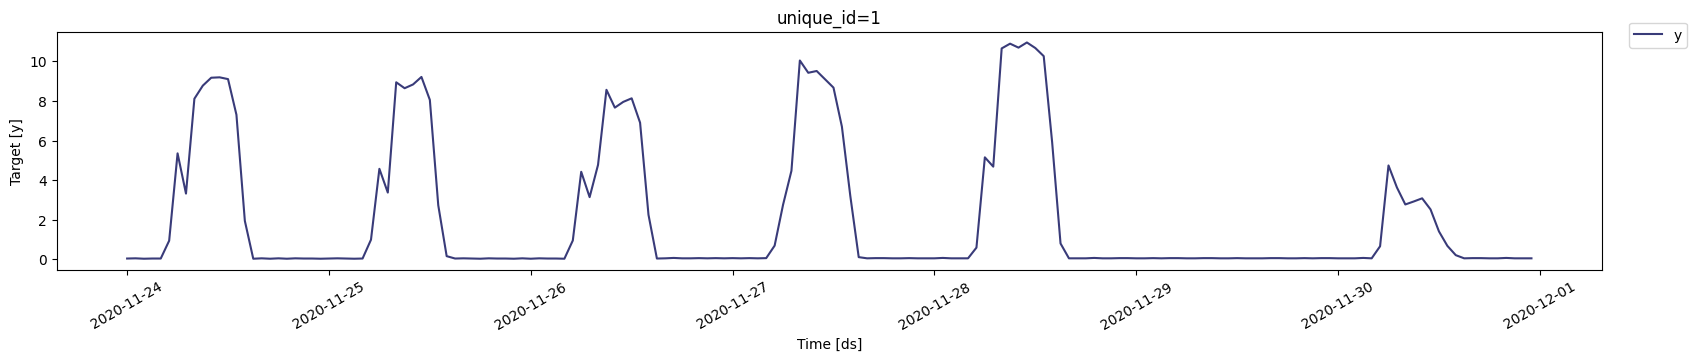

In [11]:
StatsForecast.plot(Y_df)


In [12]:
new_df=k_df.loc["2020-01-01 00:00:00":"2024-10-23 23:00:00"]
new_df.shape


new_df = new_df.groupby('unique_id').tail(7 * 24)
Y_df = pd.DataFrame({
    'ds': new_df.index,  # Timestamps as 'ds'
    'y': new_df['value'],  # The actual data as 'y'
    'unique_id':new_df['unique_id']  # The unique identifier

})


In [13]:
from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)


# Create a list of models and instantiation parameters
models = [
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=24),
    HistoricAverage(),
    DOT(season_length=24)
]


# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq="h", 
    fallback_model = SeasonalNaive(season_length=24),
    n_jobs=-1,
)

In [14]:
forecasts_df = sf.forecast(df=Y_df, h=24*10, level=[90])
forecasts_df.head()

,unique_id,ds,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90,CrostonClassic,CrostonClassic-lo-90,CrostonClassic-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,HistoricAverage,HistoricAverage-lo-90,HistoricAverage-hi-90,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-90,DynamicOptimizedTheta-hi-90
0,1,2024-10-24 00:00:00,0.03,-2.392482,2.452482,0.03,-2.392482,2.452482,0.03,-2.392482,2.452482,0.974405,-1.65296,3.601769,0.035894,-0.009727,0.093436
1,1,2024-10-24 01:00:00,0.04,-2.382482,2.462482,0.04,-2.382482,2.462482,0.04,-2.382482,2.462482,0.974405,-1.65296,3.601769,0.038344,-0.029191,0.105911
2,1,2024-10-24 02:00:00,0.03,-2.392482,2.452482,0.03,-2.392482,2.452482,0.03,-2.392482,2.452482,0.974405,-1.65296,3.601769,0.129622,-0.185408,0.389615
3,1,2024-10-24 03:00:00,0.03,-2.392482,2.452482,0.03,-2.392482,2.452482,0.03,-2.392482,2.452482,0.974405,-1.65296,3.601769,0.185516,-0.249654,0.572329
4,1,2024-10-24 04:00:00,0.03,-2.392482,2.452482,0.03,-2.392482,2.452482,0.03,-2.392482,2.452482,0.974405,-1.65296,3.601769,0.127860,-0.190281,0.447952


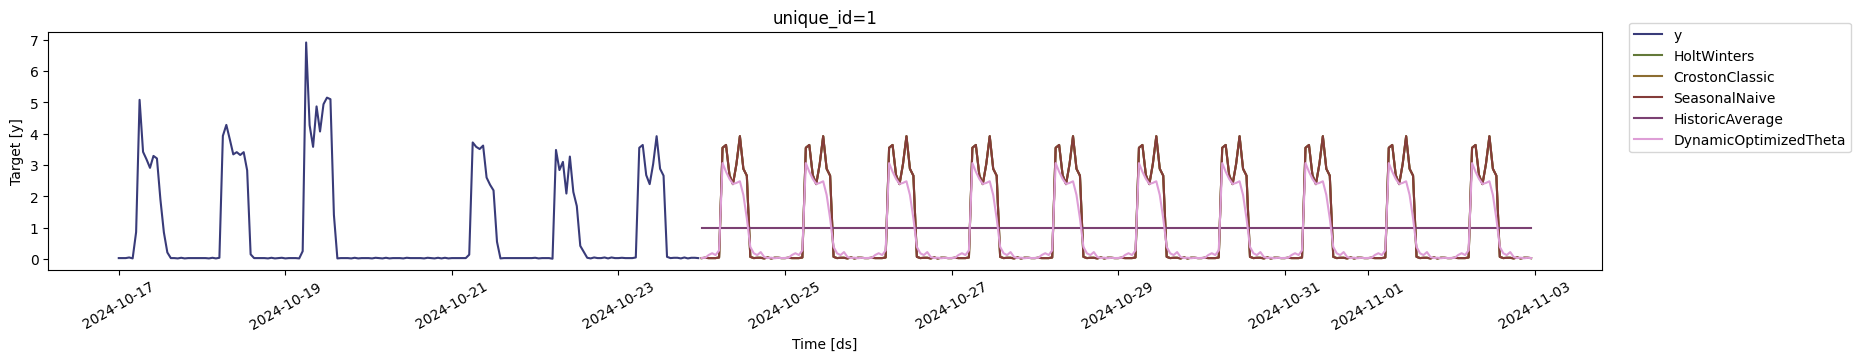

In [15]:
sf.plot(Y_df,forecasts_df)


In [96]:
cv_df = sf.cross_validation(
    df=Y_df,
    h=24,
    step_size=24,
    n_windows=2
)


In [97]:
from utilsforecast.losses import mse


In [98]:
def evaluate_cv(df, metric):
    models = df.columns.drop(['unique_id', 'ds', 'y', 'cutoff']).tolist()
    evals = metric(df, models=models)
    evals['best_model'] = evals[models].idxmin(axis=1)
    return evals


In [99]:
evaluation_df = evaluate_cv(cv_df, mse)
evaluation_df.head()


,unique_id,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,best_model
0,1,17.275942,3.947324,17.275942,5.276379,36.078224,CrostonClassic


In [100]:
evaluation_df['best_model'].value_counts().to_frame().reset_index()


,best_model,count
0,CrostonClassic,1


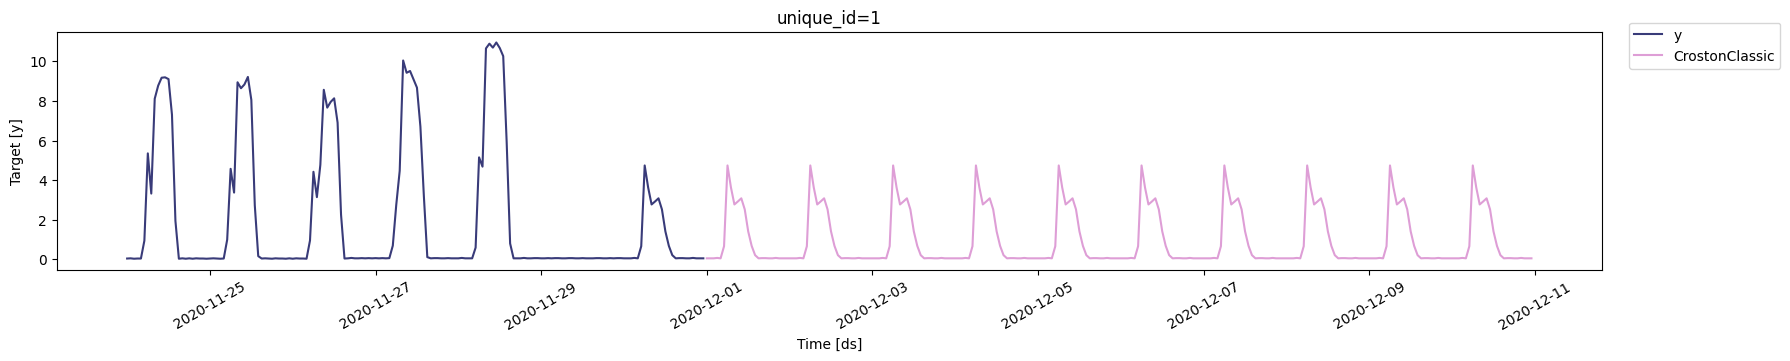

In [101]:
seasonal_ids = evaluation_df.query('best_model == "CrostonClassic"')['unique_id']
sf.plot(Y_df,forecasts_df, unique_ids=seasonal_ids, models=["CrostonClassic"])
